In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [86]:
flame = pd.read_csv("data/FireBox-flameAnalogRead.csv", index_col='time')
gas = pd.read_csv("data/FireBox-gasAnalogRead.csv", index_col='time')
humi = pd.read_csv("data/FireBox-humi.csv", index_col='time')
temp = pd.read_csv("data/FireBox-temp.csv", index_col='time')
pres = pd.read_csv("data/FireBox-presence.csv", index_col='time')
pres2 = pd.read_csv("data/FireBox-presenceV2.csv", index_col='time')

dfs = [flame, gas, humi, temp, pres, pres2]

start = pd.to_datetime('2025-05-05 00:00').tz_localize('UTC')
end   = pd.to_datetime('2025-05-19 00:00').tz_localize('UTC')

for i, df in enumerate(dfs):
    # df = df.copy()
    df.index = pd.to_datetime(df.index, utc=True).round('s')
    dfs[i]  = df.loc[(df.index >= start) & (df.index <= end)]

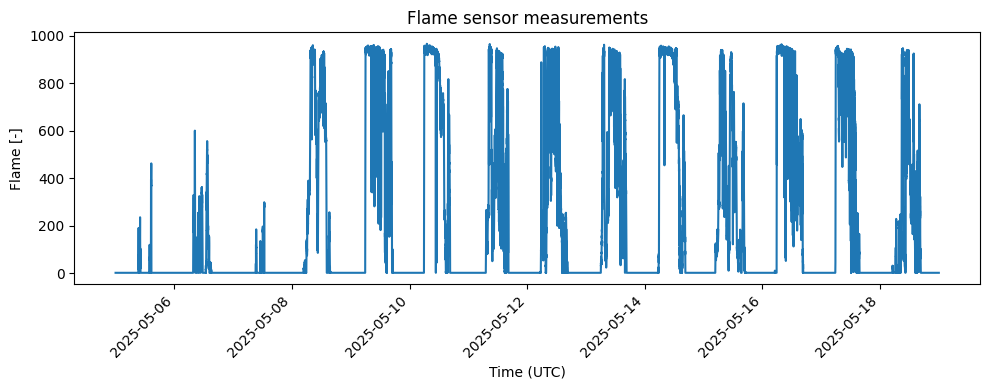

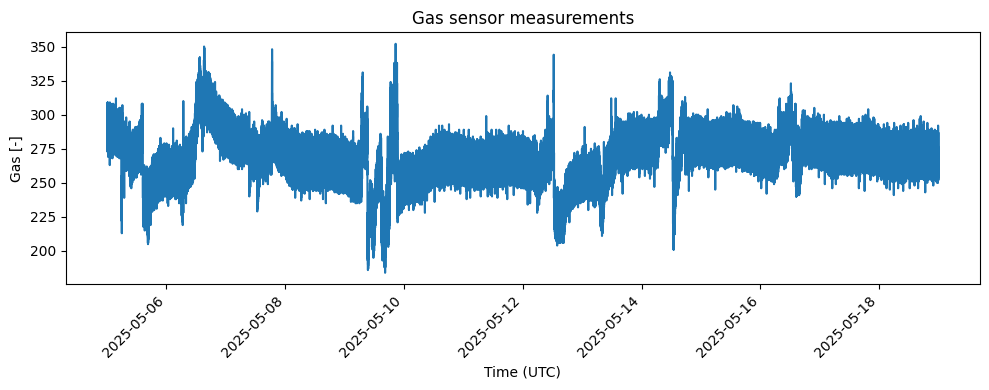

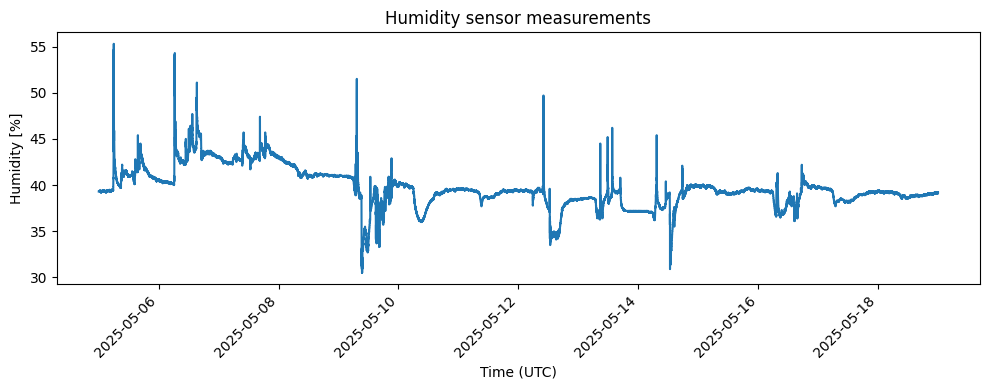

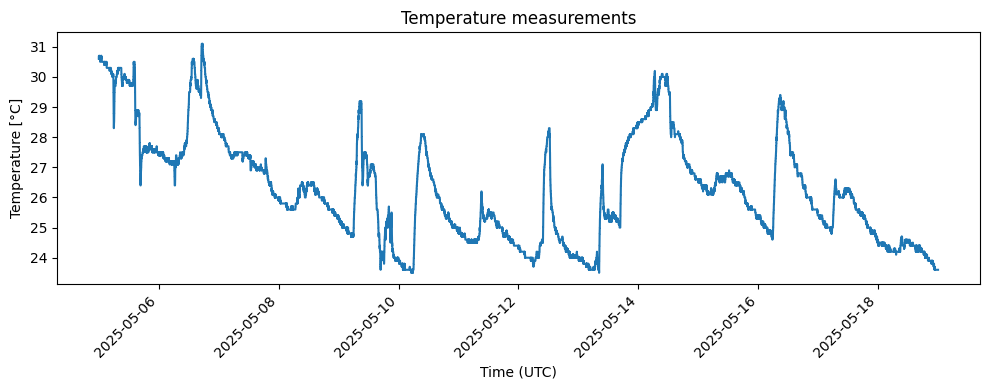

In [87]:
def plot_line_chart(data, title, y_label):

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data.index, data['value'])

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    fig.savefig(f'plots/line/{title.split()[0]}.png', dpi=300, bbox_inches='tight')
    

plot_line_chart(dfs[0], "Flame sensor measurements", "Flame [-]")
plot_line_chart(dfs[1], "Gas sensor measurements", "Gas [-]")
plot_line_chart(dfs[2], "Humidity sensor measurements", "Humidity [%]")
plot_line_chart(dfs[3], "Temperature measurements", "Temperature [°C]")
